In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Step 1: Feature Engineeering and Cleaning Data

In [3]:
#Read in data.
hotel_raw_data = pd.read_csv('hotel_booking.csv')

In [4]:
##Check for missing values and handle them appropriately.
cleaned_hotel = hotel_raw_data.copy()
cleaned_hotel.isnull().sum()
cleaned_hotel['company'] = cleaned_hotel['company'].fillna(0) #Assuming that if someone doesn't use a company to book hotel then we can add a zero here.
cleaned_hotel['agent'] = cleaned_hotel['agent'].fillna(0) #Assuming that if someone doesn't use an agent to book hotel then we can add a zero here.
cleaned_hotel['children'] = cleaned_hotel['children'].fillna(cleaned_hotel['children'].mean())
cleaned_hotel['country'] = cleaned_hotel['country'].fillna(cleaned_hotel['country'].mode().iloc[0])
cleaned_hotel = cleaned_hotel.drop_duplicates()
cleaned_hotel.isnull().sum()
# Data has no null values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [5]:
##Display basic statistics for numeric and categorical features (e.g., mean, median, mode, unique values)
cleaned_hotel.columns 
cleaned_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Delete features if you feel it would be convenient to do so.
cleaned_hotel = cleaned_hotel.drop(columns = 'arrival_date_week_number') #Unnecessary
cleaned_hotel = cleaned_hotel.drop(columns = 'reservation_status_date') #Will add noise but not much information. Plus the reservation status date has cases where it is after the stay.
cleaned_hotel = cleaned_hotel.drop(columns = 'agent') #Nearly all the data is missing so the mean is not good enough to clean it.
cleaned_hotel = cleaned_hotel.drop(columns = 'company') #Large amounts of data were missing
cleaned_hotel = cleaned_hotel.drop(columns = 'credit_card') #Unnecessary data with mostly astrix creating noise.
cleaned_hotel = cleaned_hotel.drop(columns = 'phone-number') #Most likely no associations with these random numbers besides maybe area codes.
cleaned_hotel = cleaned_hotel.drop(columns = 'email') #Email type could show age but most likely doesn't contain much information.
# Remove columns that are all zero
for col in cleaned_hotel.columns:
    if (cleaned_hotel[col] != 0).any() == False:
        cleaned_hotel = cleaned_hotel.drop(columns=col)
cleaned_hotel.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'kids_special_requests',
       'kids_booking_changes', 'parking_per_adult'],
      dtype='object')

In [67]:
##Extract or create meaningful features from the data set. Feel free to be creative.
cleaned_hotel['kids_special_requests'] = np.where((cleaned_hotel['children'] + cleaned_hotel['babies']) == 0, 0, cleaned_hotel['total_of_special_requests'] / (cleaned_hotel['children'] + cleaned_hotel['babies']))
#Added new column to see if more kids meant more special reqests.
cleaned_hotel['kids_booking_changes'] = np.where((cleaned_hotel['children'] + cleaned_hotel['babies']) == 0, 0, cleaned_hotel['booking_changes'] / (cleaned_hotel['children'] + cleaned_hotel['babies']))
#Added new column to see if kids lead to more booking changes.
cleaned_hotel['parking_per_adult'] = cleaned_hotel['required_car_parking_spaces']/cleaned_hotel['adults']
#Added column to estimate parking spots per adult.

In [69]:
##Convert String to Numeric:
cleaned_hotel = cleaned_hotel.apply(pd.to_numeric, errors='coerce')
cleaned_hotel = cleaned_hotel.fillna(0)  # Replace NaNs with 0 or cleaned_hotel.fillna(cleaned_hotel.mean())
# Apply one-hot encoding
cleaned_hotel = pd.get_dummies(cleaned_hotel)
cleaned_hotel.tail(50)

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids_special_requests,kids_booking_changes,parking_per_adult
119340,0,110,2017,29,0,5,2,0.0,0,0,0,0,1,0,171.00,0,2,0.0,0.0,0.0
119341,0,181,2017,29,0,5,1,0.0,0,0,0,0,0,0,126.90,0,2,0.0,0.0,0.0
119342,0,63,2017,31,0,3,3,0.0,0,0,0,0,0,0,195.33,0,2,0.0,0.0,0.0
119343,0,149,2017,30,0,4,2,0.0,0,0,0,0,0,0,84.60,0,0,0.0,0.0,0.0
119344,0,31,2017,31,0,3,2,0.0,0,0,0,0,0,0,152.67,0,1,0.0,0.0,0.0
119345,0,194,2017,31,0,3,2,0.0,0,0,0,0,0,0,99.00,0,0,0.0,0.0,0.0
119346,0,45,2017,27,2,5,2,0.0,0,0,0,0,0,0,183.86,0,2,0.0,0.0,0.0
119347,0,63,2017,31,0,3,3,0.0,0,0,0,0,0,0,195.33,0,2,0.0,0.0,0.0
119348,0,63,2017,31,0,3,3,0.0,0,0,0,0,0,0,195.33,0,2,0.0,0.0,0.0
119349,0,186,2017,31,0,3,2,0.0,0,0,0,0,0,0,126.00,0,2,0.0,0.0,0.0


# Step 2:Dimensionality Reduction

## PCA:

In [70]:
## Normalization/Scaling:
hotel_mean = cleaned_hotel.mean(axis=0)
hotel_std = cleaned_hotel.std(axis=0)
norm_hotel = (cleaned_hotel-hotel_mean)/hotel_std

c:\Users\thoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [71]:
## Converting to np.array
if norm_hotel.apply(lambda col: np.issubdtype(col.dtype, np.number)).all():
    hotel_cov = norm_hotel.to_numpy()
    hotel_cov = np.nan_to_num(hotel_cov, nan=0)

In [72]:
## Calculate covariance matrix using limited entries for easier computation.
num_rows, num_cols = hotel_cov.shape
num_entries = min(num_rows, 1000)
num_features = min(num_cols, 39)
hotel_cov_subset = hotel_cov[:num_entries, :num_features]
covariance_matrix = np.matmul(hotel_cov_subset.T, hotel_cov_subset) / (num_entries - 1)

#Use built in function to calculate the eigenvalues and eigenvectors.
eigen_val, eigen_vects = np.linalg.eig(covariance_matrix)
hotel_prin_comp = hotel_cov_subset @ eigen_vects

In [ ]:
## Finding optimum number of principal components.
percent = eigen_val / np.sum(eigen_val)
percent = percent * 100
p_7 = np.sum(eigen_val[0:6]) / np.sum(eigen_val)
p_12 = np.sum(eigen_val[0:11]) / np.sum(eigen_val)
p_15 = np.sum(eigen_val[0:14]) / np.sum(eigen_val)
p_17 = np.sum(eigen_val[0:16]) / np.sum(eigen_val)
print(f"Percentage of data with 7 components: ",p_7.round(5))
print(f"Percentage of data with 12 components: ",p_12.round(5))
print(f"Percentage of data with 15 components: ",p_15.round(5))
print(f"Percentage of data with 17 components: ",p_17.round(5))
print(f"15 components should provide adequate variance representation.")

Percentage of data with 7 components:  0.75875
Percentage of data with 12 components:  0.93061
Percentage of data with 15 components:  0.98269
Percentage of data with 17 components:  1.0
12 components should provide adequate variance representation.


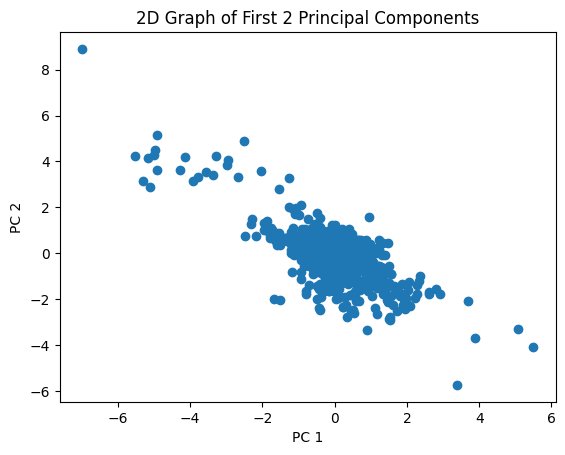

<Figure size 640x480 with 0 Axes>

In [74]:
##The 2D plot shows the graph of the first and second principal components.
pc_2D = np.dot(hotel_prin_comp, eigen_vects[:, :2])
plt.figure()
plt.scatter(pc_2D[:, 0], pc_2D[:, 1])
plt.title('2D Graph of First 2 Principal Components')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()
plt.savefig('2D_PCA.png')
##This plot will be difficult to seperate into multiple clusters because of an overlap of data.

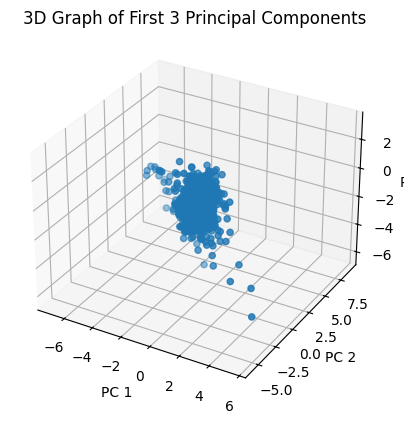

In [75]:
## The 3D graph requires the use of the Matplotlib 3D graphing function and the use of 3 principal components.
pc_3D = np.dot(hotel_prin_comp, eigen_vects[:, :3])
fig = plt.figure()
ax = fig.add_subplot(projection = '3d') 
ax.scatter(pc_3D[:, 0], pc_3D[:, 1], pc_3D[:, 2]) 
ax.set_title('3D Graph of First 3 Principal Components')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.show()
##Just like in 2D this graph will be hard to sort into clusters due to the shape of the data.

## t-SNE:

In [76]:
##Cleaning data again to make sure it works in t-SNE model.
cleaned_hotel.replace([np.inf, -np.inf], np.nan, inplace=True)
cleaned_hotel.fillna(cleaned_hotel.mean(), inplace=True)
##Scaling data to be optimized in t-SNE model.
scaler = StandardScaler()
cleaned_hotel_scaled = scaler.fit_transform(cleaned_hotel)

In [77]:
##I tried to run the whole cleaned dataset which kept breaking the kernel so I loaded in the principal components from PCA instead.
##We'll see if the t-SNE runs and plots data that is easy to interpret.
tsne = TSNE(n_components=2, random_state=42, method='barnes_hut')
hotel_tsne = tsne.fit_transform(hotel_prin_comp)
tsne.kl_divergence_
##This operation pulls up an error for deadlocks, but eventually ran without any data augmentation.

0.625367283821106

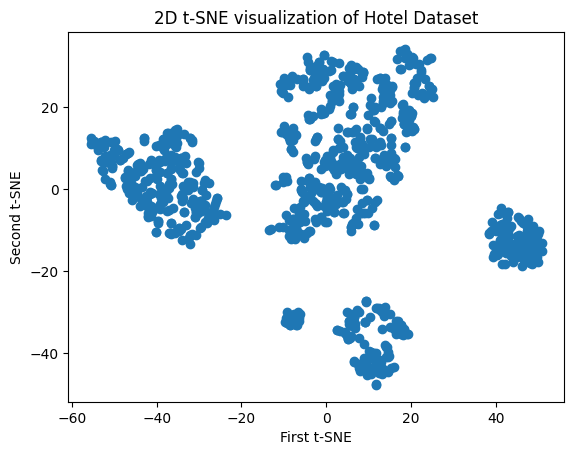

In [78]:
##Plotting 2D graph after t-SNE model trained
plt.scatter(x=hotel_tsne[:, 0], y=hotel_tsne[:, 1])
plt.title('2D t-SNE visualization of Hotel Dataset')
plt.xlabel('First t-SNE')
plt.ylabel('Second t-SNE')
plt.savefig('t-SNE_clusters.png')
#This graph provides much better clusters than the PCA technique. Training the t-SNE model on principle components seems to have worked well.

# Step 3: Clustering

## k-Means:

In [80]:
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
K = range(2,8)

np.float64(0.5348060053029797)

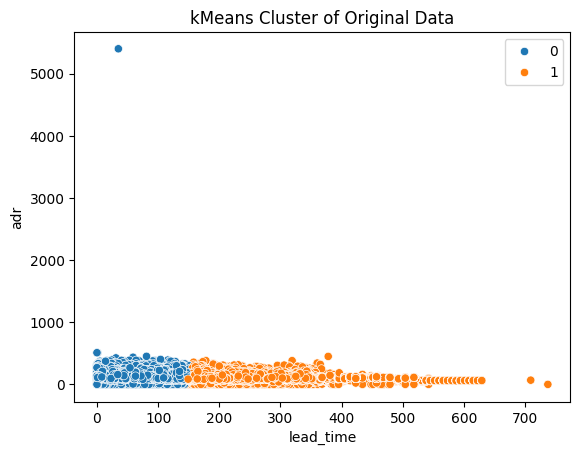

In [81]:
## Using k-Means to cluster data from the original data set.
hotel_kmean = preprocessing.normalize(cleaned_hotel)
kmeans_whole = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
kmeans_whole.fit(hotel_kmean)
sns.scatterplot(data = cleaned_hotel, x = 'lead_time', y = 'adr', hue = kmeans_whole.labels_) 
plt.title('kMeans Cluster of Original Data')
silhouette_score(hotel_kmean, kmeans_whole.labels_, metric='euclidean')
## I chose to use lead_time and adr as they were float variables and offered a lot more variation that other variables, thus the clusters are more interesting.

<Axes: >

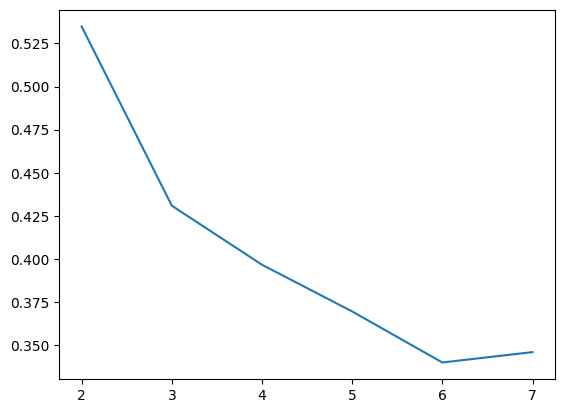

In [82]:
##I used the silhouette score to graph an elbow chart that allowed me to pick the optimal number of clusters.
fits_1=[]
score_1=[]
for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(hotel_kmean)
    fits_1.append(model)
    score_1.append(silhouette_score(hotel_kmean, model.labels_, metric='euclidean'))
sns.lineplot(x = K, y = score_1)
##I chose to use 2 clusters as that seemed to be the amount that had the best 

np.float64(0.2121805353574651)

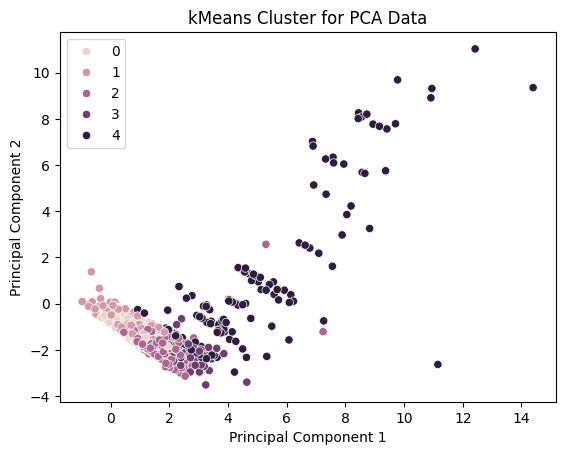

In [83]:
## Using k-Means to cluster data from the principal components.
hotel_kmean_2 = preprocessing.normalize(hotel_prin_comp)
kmeans_pca = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
kmeans_pca.fit(hotel_kmean_2)
sns.scatterplot(x = hotel_prin_comp[:,0], y = hotel_prin_comp[:,1] , hue = kmeans_pca.labels_)
plt.title('kMeans Cluster for PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
silhouette_score(hotel_kmean_2, kmeans_pca.labels_, metric='euclidean')

<Axes: >

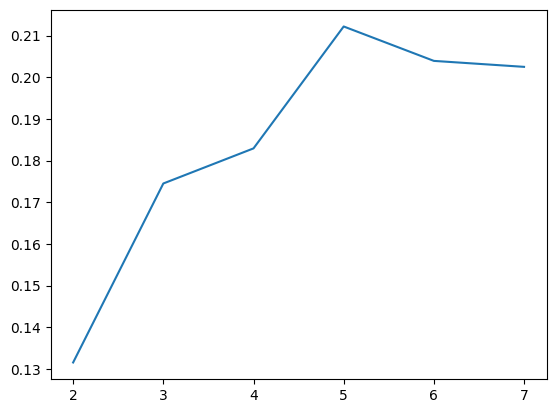

In [84]:
##I used the silhouette score to graph an elbow chart that allowed me to pick the optimal number of clusters.
fits_2=[]
score_2=[]
for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(hotel_kmean_2)
    fits_2.append(model)
    score_2.append(silhouette_score(hotel_kmean_2, model.labels_, metric='euclidean'))
sns.lineplot(x = K, y = score_2)
##I chose to use sort my data into 5 clusters as it offered the highest silhouette score.

np.float64(0.2243815292852758)

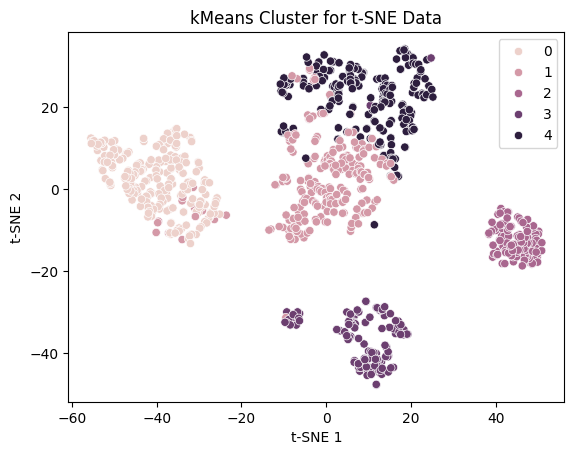

In [85]:
## Using k-Means to cluster data from the data processed using t-SNE.
hotel_kmean_3 = preprocessing.normalize(hotel_prin_comp)
kmeans_tsne = KMeans(n_clusters = 5, random_state = 5, n_init='auto')
kmeans_tsne.fit(hotel_kmean_3)
sns.scatterplot(x = hotel_tsne[:,0], y = hotel_tsne[:,1] , hue = kmeans_tsne.labels_)
plt.title('kMeans Cluster for t-SNE Data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
silhouette_score(hotel_kmean_3, kmeans_tsne.labels_, metric='euclidean')

<Axes: >

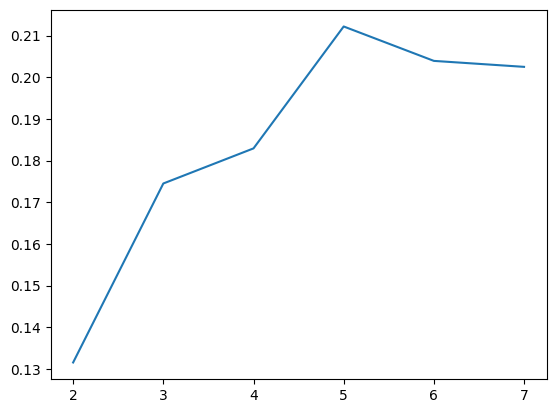

In [86]:
##I used the silhouette score to graph an elbow chart that allowed me to pick the optimal number of clusters.
fits_3=[]
score_3=[]
for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(hotel_kmean_3)
    fits_3.append(model)
    score_3.append(silhouette_score(hotel_kmean_3, model.labels_, metric='euclidean'))
sns.lineplot(x = K, y = score_3)
##I chose to use sort my data into 5 clusters as it offered the highest silhouette score.

## DBSCAN:

In [87]:
## We are going to use a DBSCAN clustering technique that will go better at categorizing abnormal data shapes.
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

## PCA:

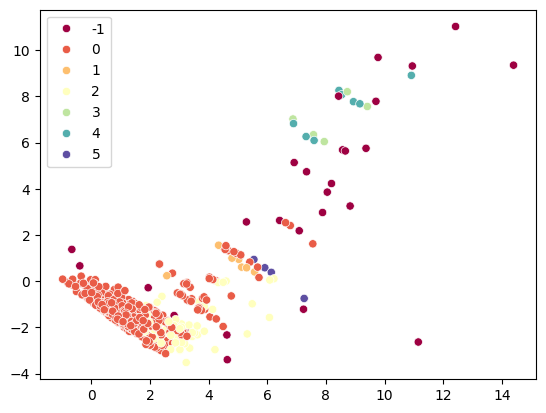

In [88]:
#We run the DBSCAN on the PCA data and adjust the eps and min_samples to find the right pattern.
dbscan_pca = DBSCAN(eps=4, min_samples=4)
clusters_pca = dbscan_pca.fit_predict(hotel_prin_comp)
sns.scatterplot(x=hotel_prin_comp[:,0] , y=hotel_prin_comp[:,1] , hue = clusters_pca, palette='Spectral', legend='full', marker='o', edgecolor='w' )
plt.savefig('PCA_DBSCAN_clusters.png')

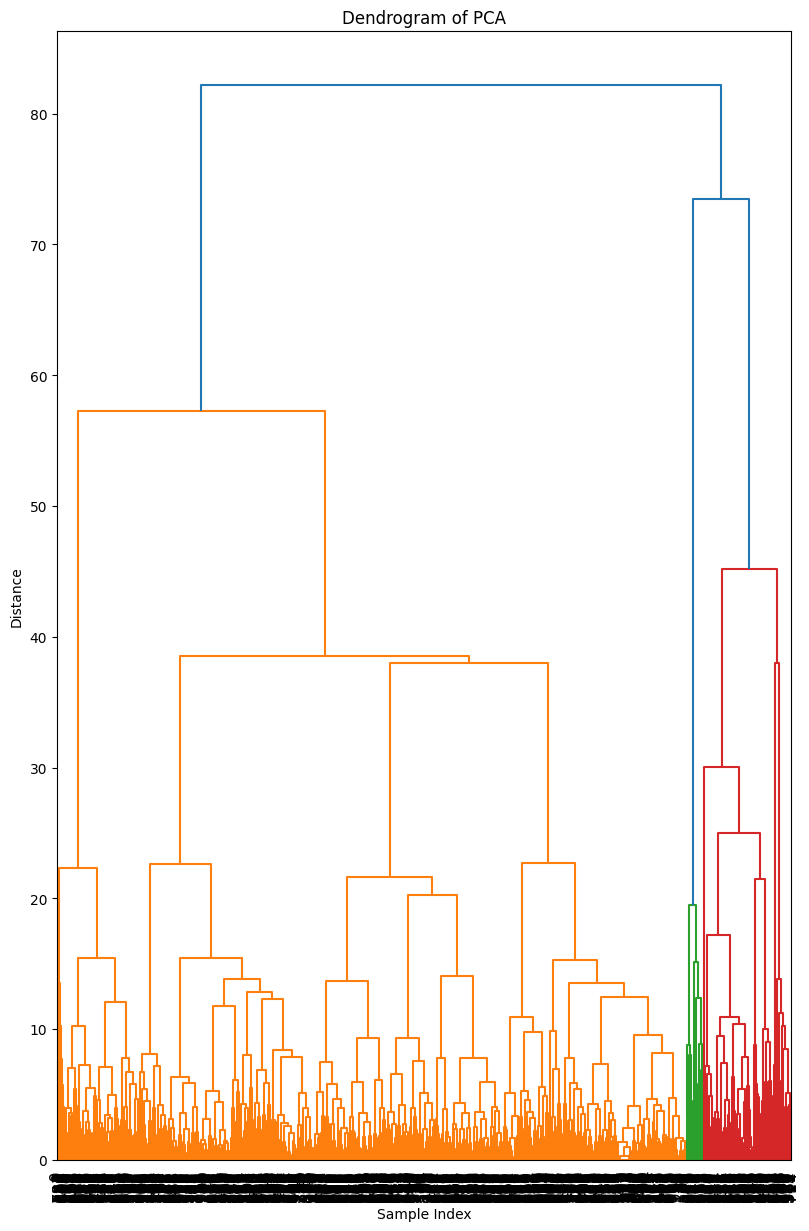

In [89]:
##Created a dendrogram in order to show the associations between the nodes of the principal components.
pca_dendrogram = linkage(hotel_prin_comp, method='ward')
plt.figure(figsize=(8,12))
dendrogram(pca_dendrogram , leaf_rotation=90, leaf_font_size=12)
plt.tight_layout()
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Dendrogram of PCA')
plt.show()

## t-SNE:

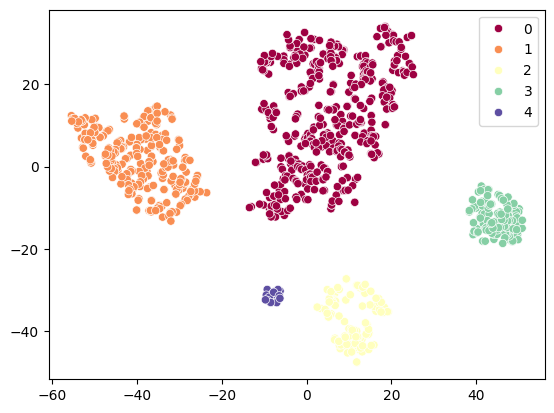

In [90]:
##We used the DBSCAN to cluster the data that had been adjusted using t-SNE.
dbscan_tsne = DBSCAN(eps=100, min_samples=1000)
clusters_tsne = dbscan_pca.fit_predict(hotel_tsne)
sns.scatterplot(x=hotel_tsne[:,0] , y=hotel_tsne[:,1] ,  hue = clusters_tsne, palette='Spectral', legend='full', marker='o', edgecolor='w')
plt.savefig('DBSCAN_clusters.png')

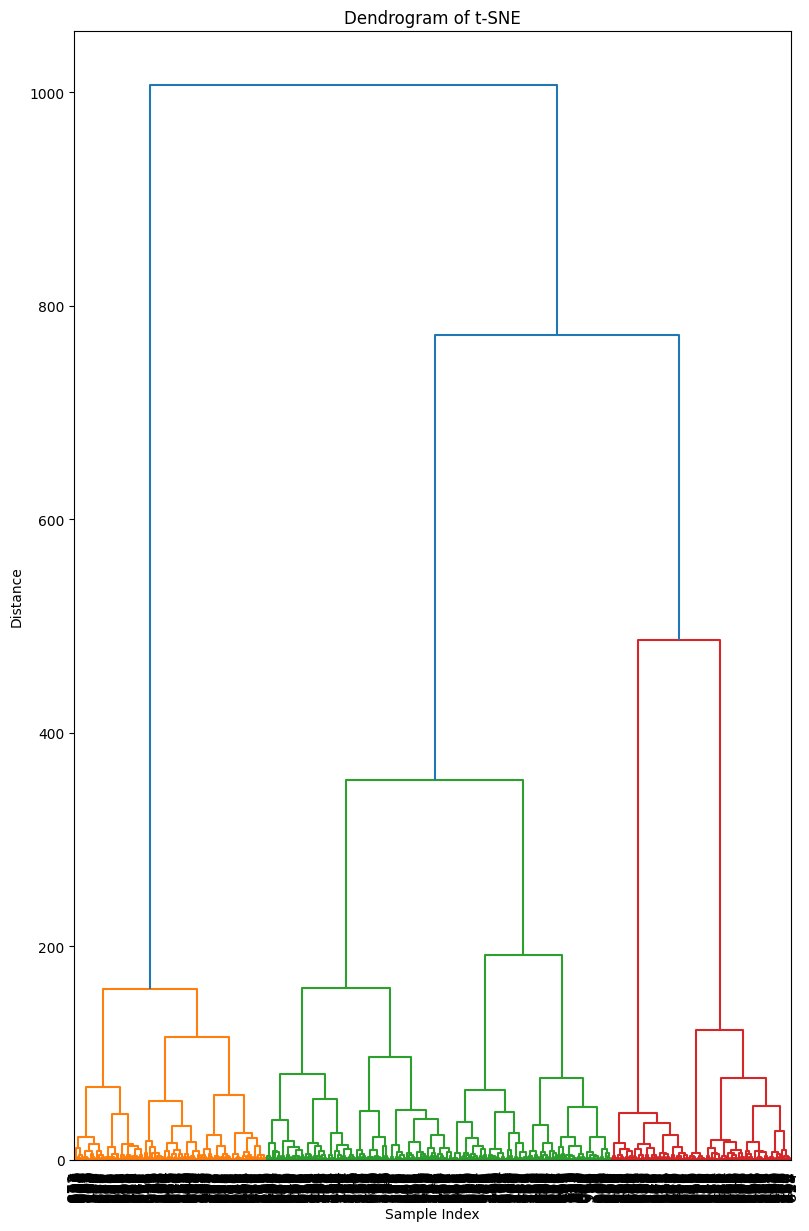

In [91]:
##The dendrogram shows the relationships between the data augmented by the t-SNE program. 
tsne_dendrogram = linkage(hotel_tsne, method='ward')
plt.figure(figsize=(8,12))
dendrogram(tsne_dendrogram , leaf_rotation=90, leaf_font_size=12)
plt.tight_layout()
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Dendrogram of t-SNE')
plt.show()